# Task 6.2. Non-linear filters - median - 2.1 - 2.7
---
***Author: Piotr Skalski***

## Imports

In [16]:
import numpy as np
import cv2
import os

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [17]:
SOURCE_DIR = "./../data/"
IMAGE_NAMES = [
    "lenaSzum.bmp",
    "lena.bmp"
]

## Loading images

In [18]:
# building paths to files
file_paths = [os.path.join(SOURCE_DIR, file) for file in IMAGE_NAMES]
# loading files
files = [cv2.imread(path, 0) for path in file_paths]

## Display images

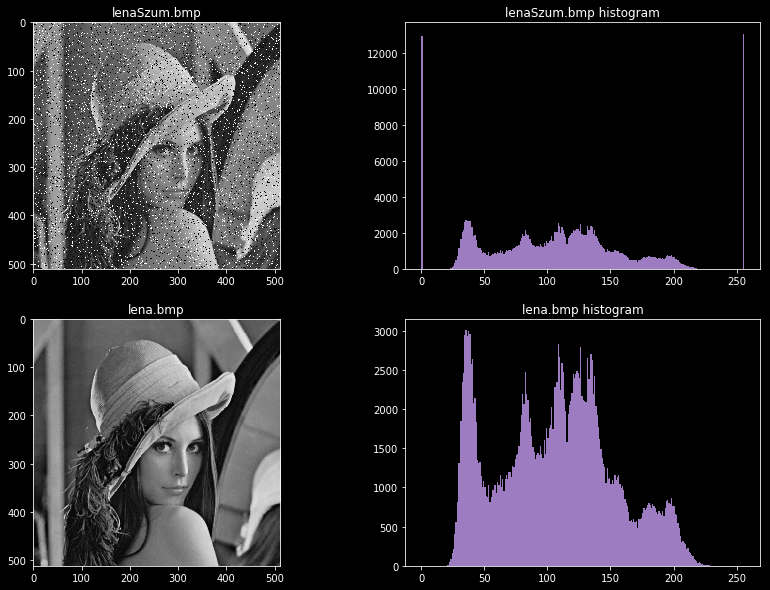

In [19]:
display_util.images_with_histograms(files_list=files, names_list=IMAGE_NAMES)

## Median Blurring

### Settings

In [20]:
IMAGE = files[0]
KERNEL_SIZE = 3

### Implementation

In [21]:
# Median blurring
output_image = cv2.medianBlur(IMAGE, KERNEL_SIZE)
# Absolute value of the image difference
diff_image = np.absolute(np.subtract(IMAGE, output_image))

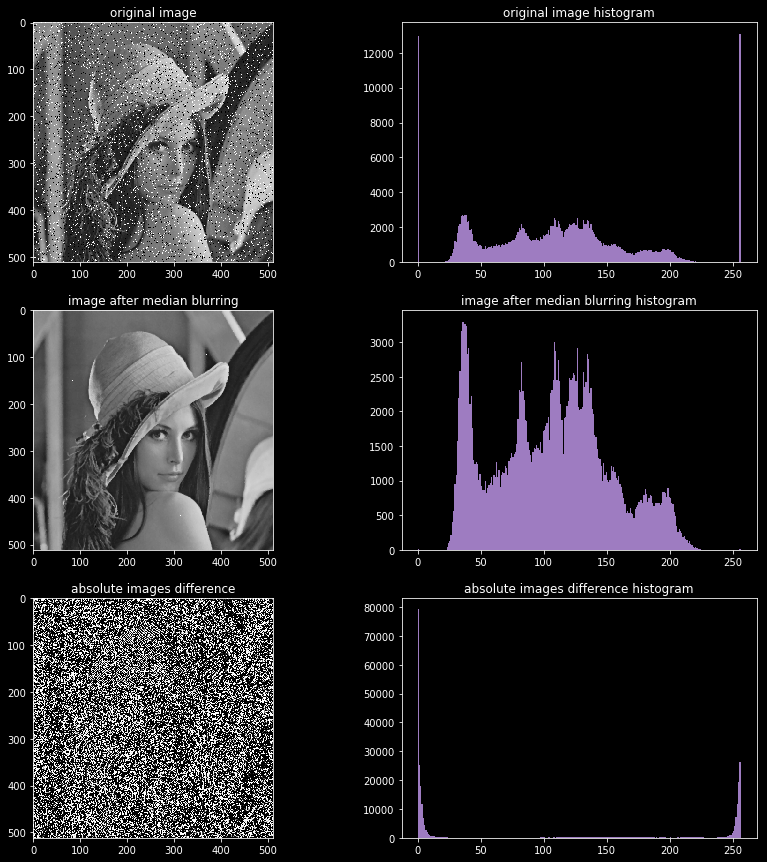

In [22]:
images_to_display = [
    IMAGE,
    output_image,
    diff_image
]

names = [
    "original image",
    "image after median blurring",
    "absolute images difference"
]

display_util.images_with_histograms(files_list=images_to_display, names_list=names)

## Median Blurring VS Averaging

### Settings

In [23]:
IMAGE = files[1]
KERNEL_SIZE = 3

### Implementation

In [24]:
# Median blurring
output_image_median = cv2.medianBlur(IMAGE, KERNEL_SIZE)
# Absolute value of the image difference
diff_image_median = np.absolute(np.subtract(IMAGE, diff_image_median))

# Kernel for averaging
kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE),np.float32)/(KERNEL_SIZE**2)
# Averaging
output_images_avg = cv2.filter2D(IMAGE, -1, kernel)
# Absolute value of the image difference
diff_image_avg = np.absolute(np.subtract(IMAGE, output_images_avg))

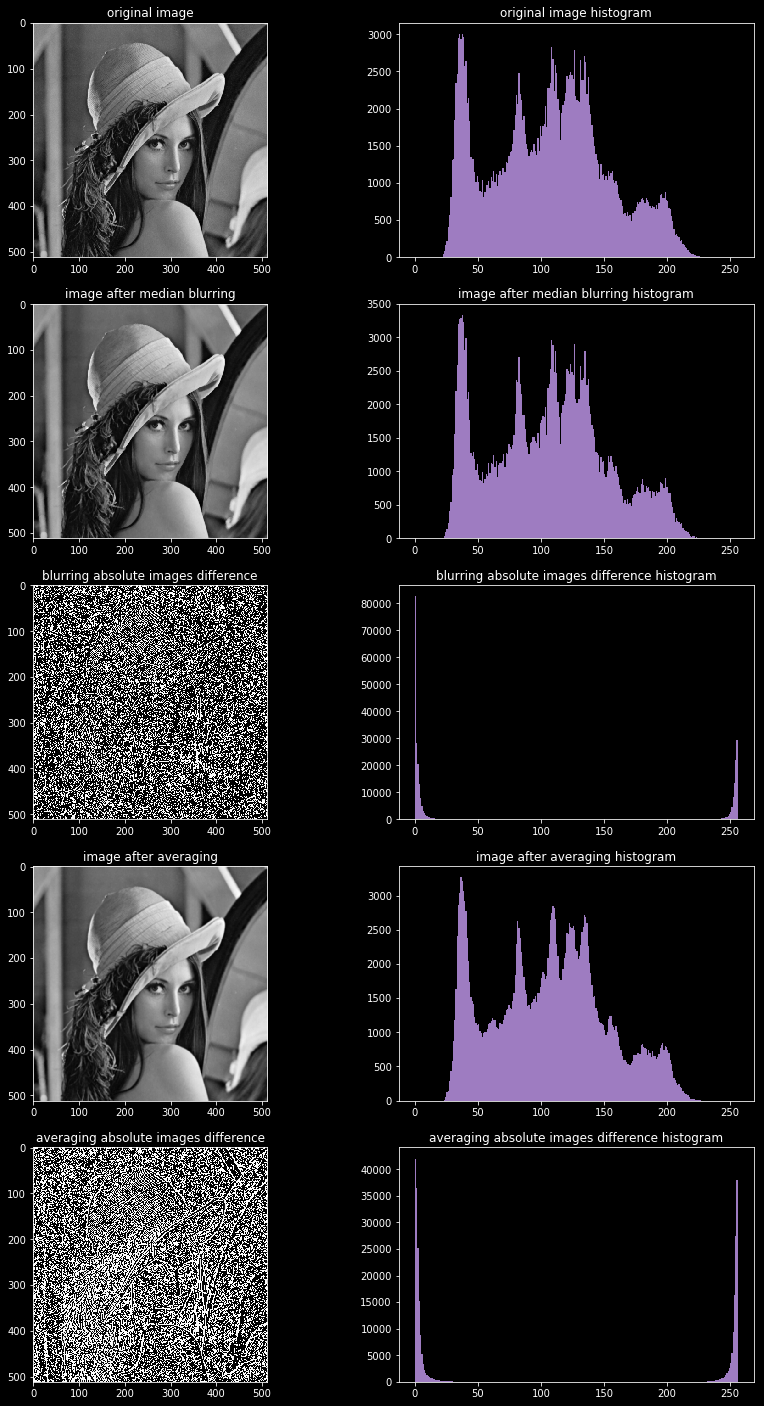

In [27]:
images_to_display = [
    IMAGE,
    output_image_median,
    diff_image_median,
    output_images_avg,
    diff_image_avg
]

names = [
    "original image",
    "image after median blurring",
    "blurring absolute images difference",
    "image after averaging",
    "averaging absolute images difference"
]

display_util.images_with_histograms(files_list=images_to_display, names_list=names)

## Posterisation

### Settings

In [28]:
IMAGE = files[1]
KERNEL_SIZE = 5

### Implementation

In [35]:
# Initiation of the list of images
output_images = [IMAGE]
# Initiation of the list of images names
output_images_names = ["original image"]
# Temporary variable that stores the last image
last_image = IMAGE
for i in range(1, 11):
    last_image = cv2.medianBlur(last_image, KERNEL_SIZE)
    if (i % 2 == 0):
        output_images.append(last_image)
        output_images_names.append("averaging iteration {}".format(i))

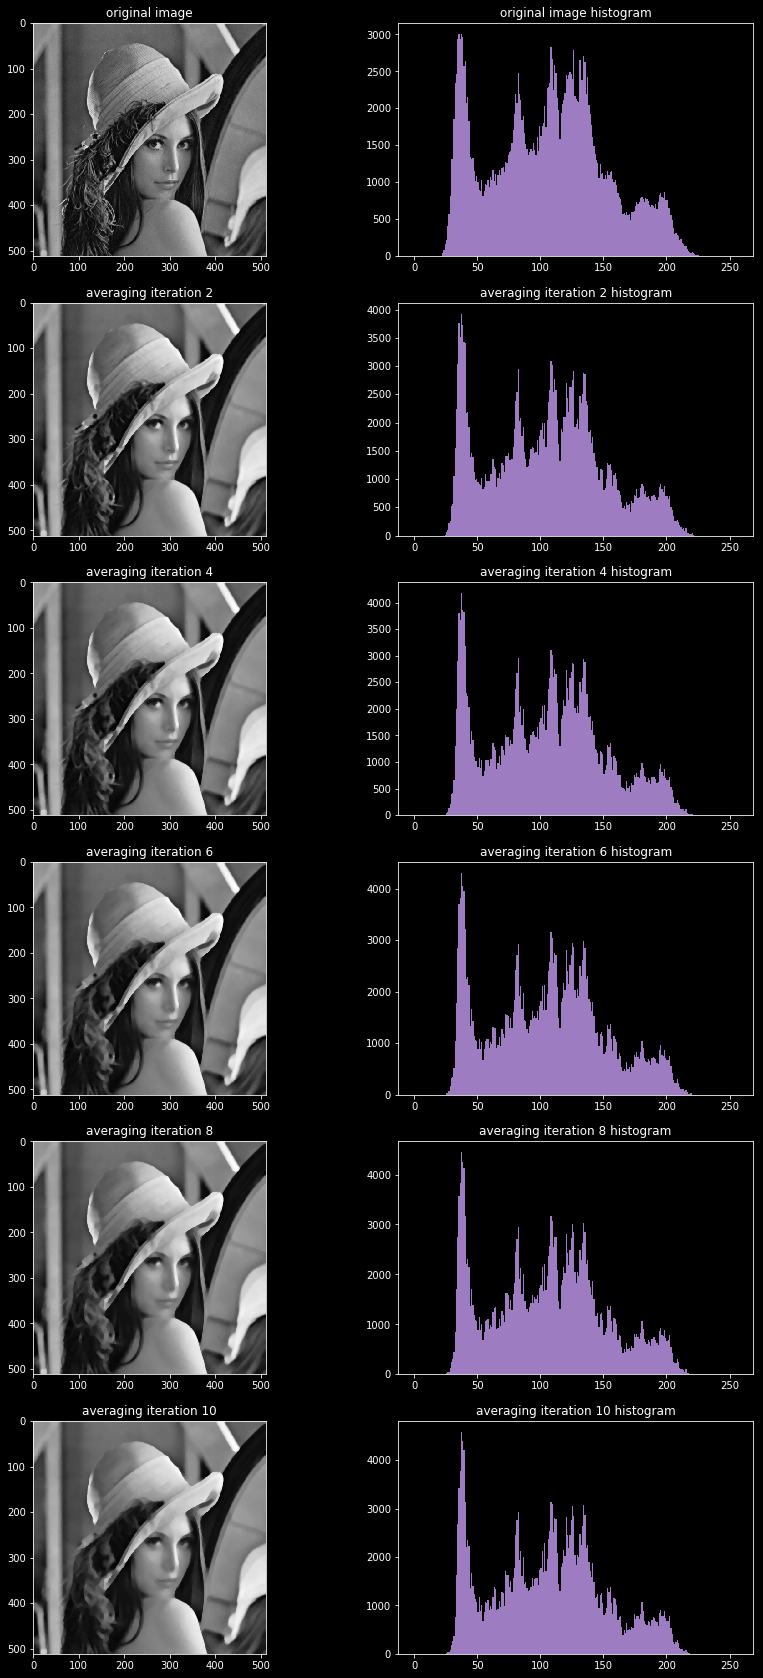

In [36]:
display_util.images_with_histograms(files_list=output_images, names_list=output_images_names)